## Importing libraries and data


In [1]:
import os
import pandas as pd
import numpy as np
import folium
from folium import plugins, branca
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_context("talk")

pd.set_option("display.max_columns", None)

In [2]:
city = "montreal"

In [3]:
data = pd.read_csv(f"data/{city}.csv")
data.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,534948,https://www.airbnb.com/rooms/534948,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,<b>The space</b><br />The apartment is fully e...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1610679,https://www.airbnb.com/users/show/1610679,Edward,2012-01-15,"Bissau, Guinea-Bissau","Hey, I'm from Montreal , Canada .. fascinati...",within a few hours,100%,56%,t,https://a0.muscache.com/im/users/1610679/profi...,https://a0.muscache.com/im/users/1610679/profi...,Little Burgundy,3,4,"['email', 'phone', 'work_email']",t,t,NaN,Le Sud-Ouest,NaN,45.48730,-73.57330,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Outdoor dining area"", ""Resort ...",$88.00,31,62,31,31,62,62,31.0,62.0,NaN,t,3,27,56,56,2023-09-03,6,2,1,2013-01-16,2023-09-01,4.83,4.67,4.50,4.50,5.00,4.83,4.83,NaN,f,1,1,0,0,0.05
1,542160,https://www.airbnb.com/rooms/542160,20230902231108,2023-09-03,city scrape,Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...,<b>The space</b><br />I am renting my lovely c...,"Le plateau Mont-Royal is in my opinion, the be...",https://a0.muscache.com/pictures/29641965/040b...,2666170,https://www.airbnb.com/users/show/2666170,Alex,2012-06-17,"Montreal, Canada",Hello!\r\n\r\nI am a film/travel tv series dir...,within a day,50%,57%,f,https://a0.muscache.com/im/pictures/user/e4efc...,https://a0.muscache.com/im/pictures/user/e4efc...,Le Plateau,3,6,"['email', 'phone', 'work_email']",t,t,"Montreal, Quebec, Canada",Le Plateau-Mont-Royal,NaN,45.53666,-73.58142,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Oven"", ""Patio or balcony""...",$91.00,31,1125,31,31,1125,1125,31.0,1125.0,NaN,t,2,16,26,274,2023-09-03,192,8,1,2014-05-20,2023-08-19,4.77,4.80,4.82,4.95,4.89,4.68,4.78,"284723, expires: 2024-06-30",f,2,2,0,0,1.70
2,556742,https://www.airbnb.com/rooms/556742,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,The building is occupied by families mostly. T...,"This neighborhood is our favorite, the Avenue ...",https://a0.muscache.com/pictures/9263006/946af...,2737452,https://www.airbnb.com/users/show/2737452,Carole,2012-06-25,"Montreal, Canada","Nous sommes une famille, nous avons fait l'acq...",within a few hours,100%,100%,t,https://a0.muscache.com/im/users/2737452/profi...,https://a0.muscache.com/im/users/2737452/profi...,Le Plateau,2,2,"['email', 'phone', 'work_email']",t,t,"Montreal, Quebec, Canada",Le Plateau-Mont-Royal,NaN,45.53090,-73.56854,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Self check-in"", ""Private entra...",$101.00,31,1125,31,31,1125,1125,31.0,1125.0,NaN,t,0,0,

## Exploratory data analysis & data cleaning


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7933 non-null   int64  
 1   listing_url                                   7933 non-null   object 
 2   scrape_id                                     7933 non-null   int64  
 3   last_scraped                                  7933 non-null   object 
 4   source                                        7933 non-null   object 
 5   name                                          7933 non-null   object 
 6   description                                   7887 non-null   object 
 7   neighborhood_overview                         4298 non-null   object 
 8   picture_url                                   7933 non-null   object 
 9   host_id                                       7933 non-null   i

In [5]:
object_to_dtype = {
    "host_since": "datetime64[ns]",
    "host_response_rate": "float",
    "host_acceptance_rate": "float",
    "host_is_superhost": "bool",
    "host_has_profile_pic": "bool",
    "host_identity_verified": "bool",
    "instant_bookable": "bool",
    "has_availability": "bool",
}

for col, dtype in object_to_dtype.items():
    if dtype == "float":
        data[col] = data[col].str.replace("%", "").astype(dtype)
    elif dtype == "bool":
        data[col] = data[col].map({"t": True, "f": False}).astype(dtype)
    elif dtype == "datetime64[ns]":
        data[col] = pd.to_datetime(data[col])
    else:
        raise ValueError(f"Unknown dtype: {dtype}")

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            7933 non-null   int64         
 1   listing_url                                   7933 non-null   object        
 2   scrape_id                                     7933 non-null   int64         
 3   last_scraped                                  7933 non-null   object        
 4   source                                        7933 non-null   object        
 5   name                                          7933 non-null   object        
 6   description                                   7887 non-null   object        
 7   neighborhood_overview                         4298 non-null   object        
 8   picture_url                                   7933 non-null   object

In [7]:
# Convert daily price in local currency to float
data["price"] = data["price"].str.replace(r"(\$|,)", "").astype(float)

In [8]:
# Clean up the amenities column
data["amenities"] = data["amenities"].str.replace(r"\[|\]|\"", "")


In [9]:
# Remove outliers (price > 95% quantile)
data_cleaned = data[
    (data["price"] < data["price"].quantile(0.95)) & (data["minimum_nights"] <= 365)
]
print(f"Rows dropped: {data.shape[0] - data_cleaned.shape[0]}")

Rows dropped: 410


In [10]:
# Extract numerical value from `bathrooms_text` column
data_cleaned["bathrooms"] = (
    data["bathrooms_text"].str.extract("(\d+\.?\d*)", expand=False).astype(float)
)

# Create new column `bathrooms_is_shared` indicating if bathroom is shared or not
data_cleaned["bathrooms_is_shared"] = data["bathrooms_text"].str.contains(
    "shared", case=False
)


In [11]:
# Fill NAs for bedrooms with median value of bedrooms by neighbourhood
data_cleaned["bedrooms"] = data_cleaned.groupby("neighbourhood_cleansed")[
    "bedrooms"
].transform(lambda x: x.fillna(x.median()))


In [12]:
# Add a column for number of key amenities provided
data["amenities"] = data["amenities"].str.replace(r"\[|\]|\"", "")

list_of_amenities = (
    data_cleaned["amenities"]
    .str.split(", ")
    .explode()
    .value_counts()
    .to_frame()
    .reset_index()
)

top_20_amenities = list_of_amenities.head(20)["index"].to_list()

data_cleaned["num_amenities"] = (
    data_cleaned["amenities"]
    .apply(lambda x: x.split(", "))
    .apply(lambda y: len(set(y).intersection(set(top_20_amenities))))
)


### What is the distribution of listing prices?

As we can see, there are no null values in the price column, but there appear to be some outliers in the data. Let's remove the listings with daily prices above the 95th percentile and see what the distribution looks like.


In [13]:
data["price"].describe()

count      7933.000000
mean        205.817597
std        1276.067877
min          14.000000
25%          80.000000
50%         130.000000
75%         219.000000
max      110526.000000
Name: price, dtype: float64

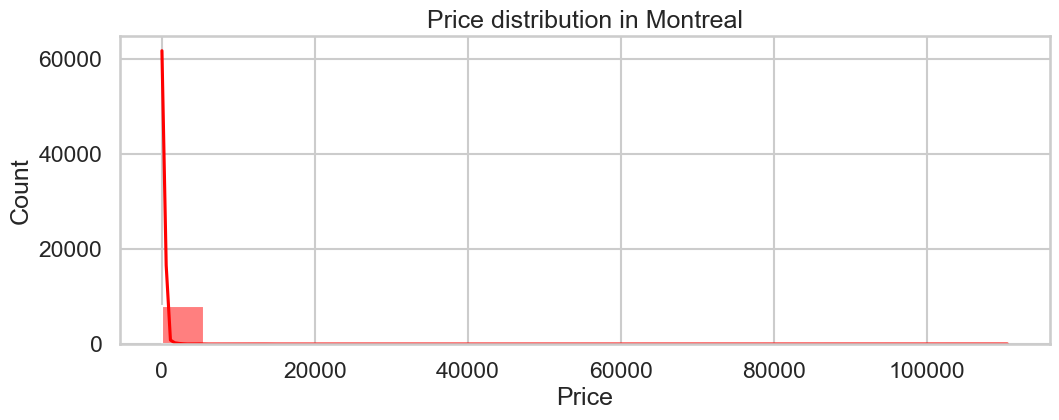

In [14]:
plt.figure(figsize=(12, 4))
ax = sns.histplot(data=data, x="price", color="r", bins=20, kde=True)
ax.set_title(f"Price distribution in {city.capitalize()}")
ax.set_xlabel("Price")
plt.show()


#### Outliers removed

After removing the outliers, the distribution of listing prices looks much more normal.

The average price is $150 per night, with a standard deviation of ~$95. The distribution is slightly skewed to the right, which is expected with price data as there could be a fewer number of "luxury" listings that are much more expensive than the average listing.


In [15]:
data_cleaned["price"].describe()

count    7523.000000
mean      149.935531
std        94.293574
min        14.000000
25%        79.000000
50%       125.000000
75%       200.000000
max       467.000000
Name: price, dtype: float64

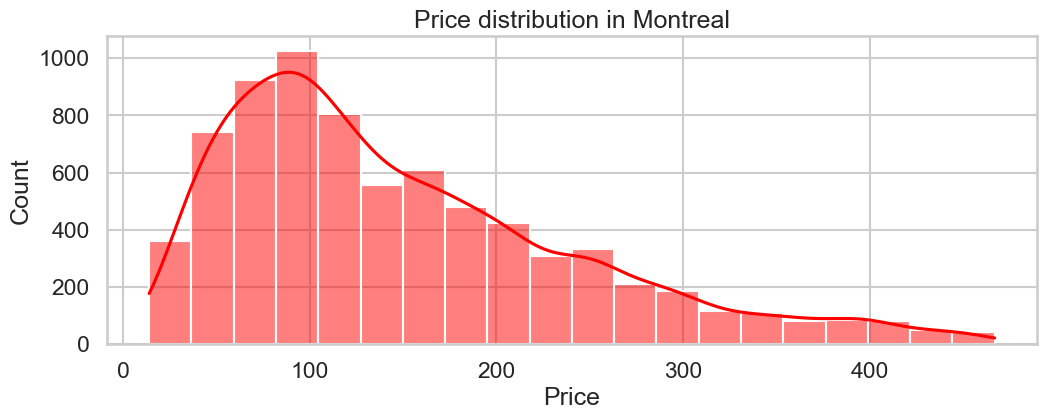

In [16]:
plt.figure(figsize=(12, 4))
ax = sns.histplot(data=data_cleaned, x="price", color="r", bins=20, kde=True)
ax.set_title(f"Price distribution in {city.capitalize()}")
ax.set_xlabel("Price")
plt.show()


### What is the relationship between the location of the listing (neighborhood) and the price?

We see that most listings are in the neighborhoods of Ville-Marie, Le Plateau-Mont-Royal, Le Sud-Ouest, Côte-des-Neiges-Notre-Dame-de-Grâce, Rosemont-La Petite-Patrie and Mercier-Hochelaga-Maisonneuve.


In [24]:
# First, we check the `neighbourhood_cleansed` column
num_listings_by_neighborhood = (
    data_cleaned["neighbourhood_cleansed"]
    .value_counts()
    # .to_frame()
    # .reset_index()
    # .rename(columns={"index": "neighbourhood", "neighbourhood_cleansed": "count"})
)

num_listings_by_neighborhood

Ville-Marie                                 2260
Le Plateau-Mont-Royal                       1620
Le Sud-Ouest                                 617
Côte-des-Neiges-Notre-Dame-de-Grâce          561
Rosemont-La Petite-Patrie                    546
Mercier-Hochelaga-Maisonneuve                511
Villeray-Saint-Michel-Parc-Extension         336
Ahuntsic-Cartierville                        214
Verdun                                       192
Saint-Laurent                                122
LaSalle                                       88
Lachine                                       75
Saint-Léonard                                 44
Outremont                                     43
Anjou                                         37
Rivière-des-Prairies-Pointe-aux-Trembles      31
Pierrefonds-Roxboro                           30
Westmount                                     30
Pointe-Claire                                 26
Beaconsfield                                  25
Mont-Royal          

In [ ]:

num_listings_by_neighborhood.style.background_gradient(
    sns.light_palette("red", as_cmap=True)
).set_properties(**{"text-align": "center"}).set_table_styles(
    [
        dict(selector="th", props=[("text-align", "center")]),
        dict(
            selector="caption", props=[("font-size", "14px"), ("font-weight", "bold")]
        ),
    ],
).hide_index().set_caption(
    f"Number of listings by neighborhood in {city.capitalize()}"
).relabel_index(
    {0: "Neighborhood", 1: "# of listings"},
    axis="columns",
)


#### Average price by neighborhood

We can check the average price of the top 15 neighborhoods with the most listings. We see that the average price is highest in Outremont, followed by Ville-Marie and Le Plateau-Mont-Royal.


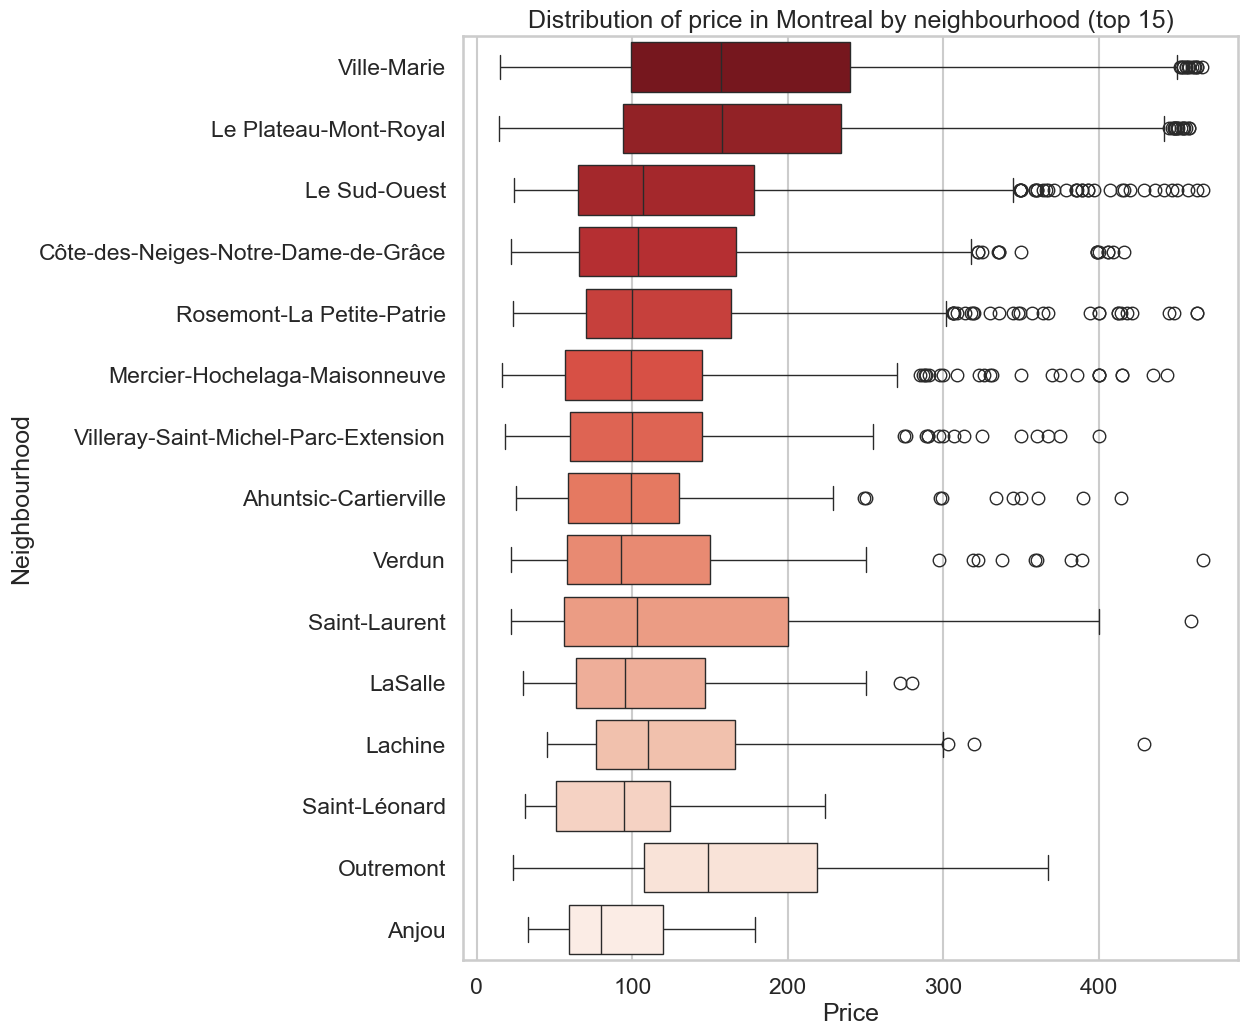

In [18]:
# Then, we see the price of listings in the top 15 neighbourhoods
plt.figure(figsize=(10, 12))
ax = sns.boxplot(
    data=data_cleaned[
        data_cleaned["neighbourhood_cleansed"].isin(
            num_listings_by_neighborhood.iloc[:15].neighbourhood.values
        )
    ],
    y="neighbourhood_cleansed",
    x="price",
    order=num_listings_by_neighborhood.iloc[:15].neighbourhood.values,
    palette="Reds_r",
)
ax.set_title(f"Distribution of price in {city.capitalize()} by neighbourhood (top 15)")
ax.set_ylabel("Neighbourhood")
ax.set_xlabel("Price")
plt.show()

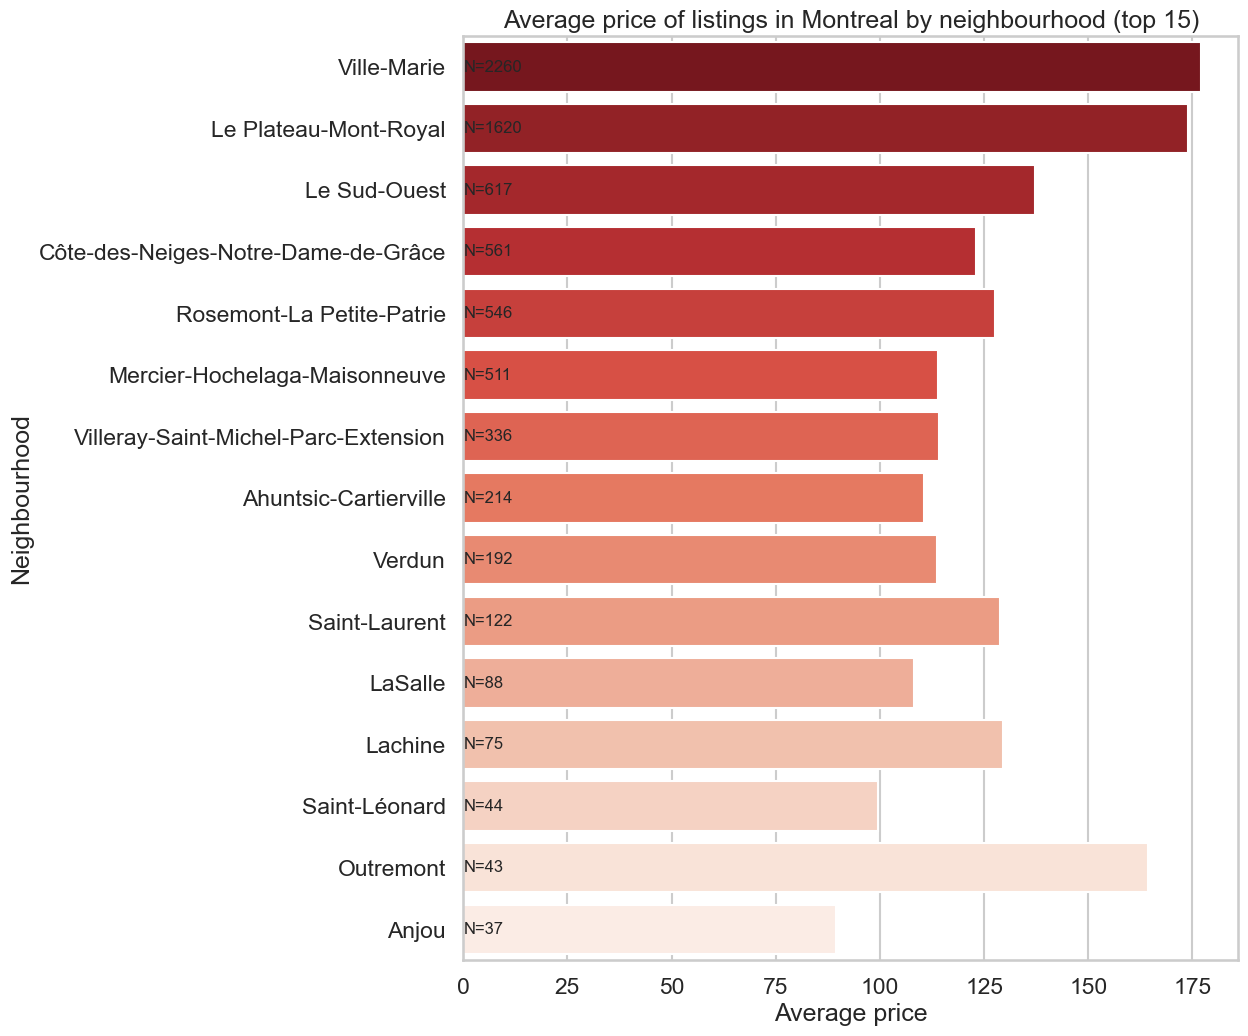

In [19]:
# Finally, we plot the mean price of listings in the top 15 neighbourhoods
avg_price_by_neighborhood = (
    (
        data_cleaned[
            data_cleaned["neighbourhood_cleansed"].isin(
                num_listings_by_neighborhood.iloc[:15].neighbourhood.values
            )
        ]
        .groupby("neighbourhood_cleansed")["price"]
        .agg(["mean", "count"])
    )
    .reindex(index=num_listings_by_neighborhood.iloc[:15].neighbourhood.values)
    .reset_index()
)

plt.figure(figsize=(10, 12))
ax = sns.barplot(
    avg_price_by_neighborhood,
    y="neighbourhood_cleansed",
    x="mean",
    order=num_listings_by_neighborhood.iloc[:15].neighbourhood.values,
    palette="Reds_r",
)

for i in range(15):
    ax.text(
        0,
        i,
        f"N={avg_price_by_neighborhood.iloc[i]['count']}",
        va="center",
        fontsize=12,
    )

ax.set_title(
    f"Average price of listings in {city.capitalize()} by neighbourhood (top 15)"
)
ax.set_ylabel("Neighbourhood")
ax.set_xlabel("Average price")
plt.show()


The average price does vary by neighborhood, indicating that the location of the listing is an important factor in determining the price. We can conduct a statistical test to see if the difference in average price between neighborhoods is significant.

Since we have more than two groups, we will use [ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to test if the difference in average price between neighborhoods is significant.


In [20]:
f_stat, p_value = stats.f_oneway(
    *data_cleaned.groupby("neighbourhood_cleansed")["price"]
    .apply(list)
    .reset_index()["price"]
    .values
)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")


f-statistic: 22.135190121516107
p-value: 1.1502741900311699e-125


Since the computed p-value is less than 0.05, we can reject the null hypothesis that the average price is the same across all neighborhoods. This means that the difference in average price between neighborhoods is statistically significant.


### How does the type of property (apartment, house, private room, shared room) affect the price?

We see that most listings are for entire apartments/houses, followed by private rooms. We can double-click on the legend to hide/show the different property types.


In [21]:
# First, we check the `room_type` column
num_listings_by_room_type = (
    data_cleaned["room_type"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "room_type", "room_type": "count"})
)

num_listings_by_room_type.style.background_gradient(
    sns.light_palette("red", as_cmap=True)
).set_properties(**{"text-align": "center"}).set_table_styles(
    [
        dict(selector="th", props=[("text-align", "center")]),
        dict(
            selector="caption", props=[("font-size", "14px"), ("font-weight", "bold")]
        ),
    ],
).hide_index().set_caption(
    f"Number of listings by room type in {city.capitalize()}"
).relabel_index(
    {0: "Room type", 1: "# of listings"},
    axis="columns",
)


Room type,# of listings
Entire home/apt,6149
Private room,1304
Shared room,55
Hotel room,15


Within the "Entire home/apt" room type, ~72% of the listings are for the entire unit. This indicates that the `property_type` column is redundant, and we can directly use `room_type` as a feature in our model.


In [22]:
data_cleaned[data_cleaned["room_type"] == "Entire home/apt"][
    "property_type"
].value_counts(normalize=True).to_frame()


,property_type
Entire rental unit,0.719304
Entire condo,0.148317
Entire loft,0.047487
Entire home,0.034477
Entire serviced apartment,0.018540
Entire townhouse,0.013823
Entire guest suite,0.005204
Room in aparthotel,0.004716
Entire bungalow,0.002277
Entire cottage,0.001301


#### Distribution of price by room type


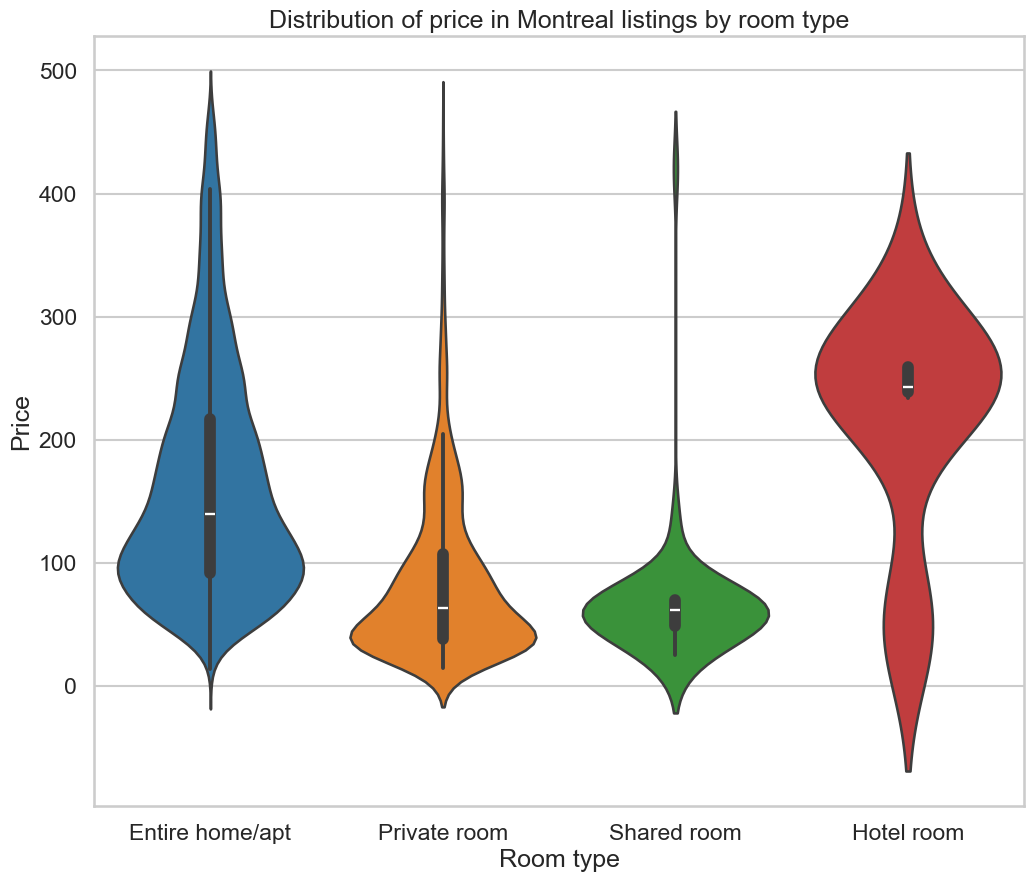

In [23]:
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    data=data_cleaned,
    x="room_type",
    y="price",
    hue="room_type",
    order=num_listings_by_room_type.room_type.values,
)
ax.set_title(f"Distribution of price in {city.capitalize()} listings by room type")
ax.set_ylabel("Price")
ax.set_xlabel("Room type")
plt.show()


### What is the impact of the number of bedrooms and bathrooms on the price?

There are a lot of listings with missing values for the number of bedrooms. We can impute the missing values using the median value for the neighborhood.


In [24]:
# Check for missing values
data[["bedrooms", "beds"]].isnull().sum()


bedrooms    1787
beds          79
dtype: int64

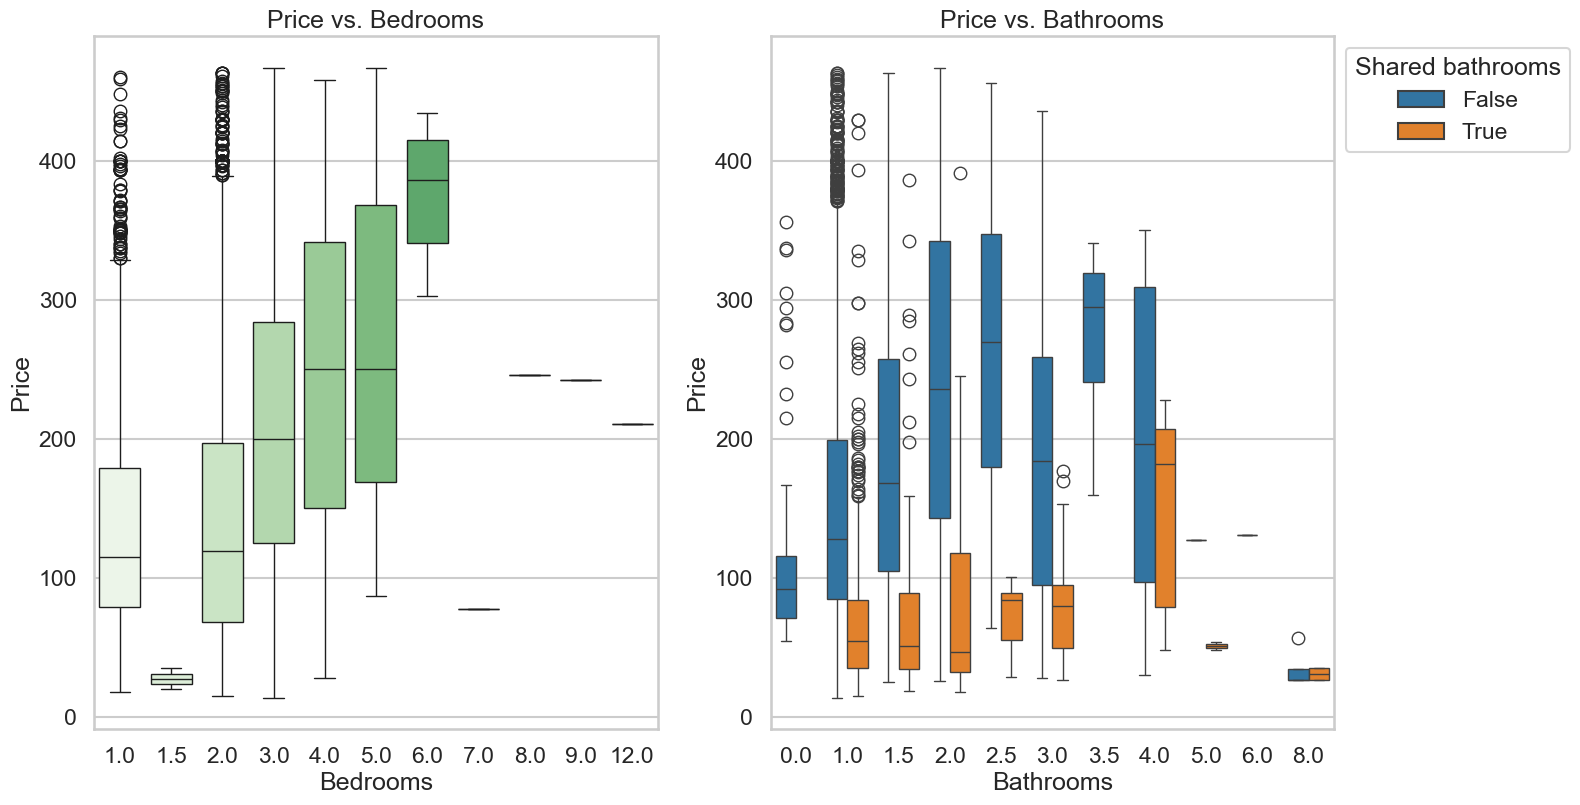

In [25]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=data_cleaned, x="bedrooms", y="price", palette="Greens")
ax1.set_title("Price vs. Bedrooms")
ax1.set_xlabel("Bedrooms")
ax1.set_ylabel("Price")

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(
    data=data_cleaned,
    x="bathrooms",
    y="price",
    hue="bathrooms_is_shared",
)
ax2.set_title("Price vs. Bathrooms")
ax2.set_xlabel("Bathrooms")
ax2.set_ylabel("Price")
sns.move_legend(
    ax2, "upper left", bbox_to_anchor=(1, 1), ncol=1, title="Shared bathrooms"
)

plt.show()


### How do amenities offered influence the price?

There are ~1900 unique amenities offered by the listings. We can look at the top 20 amenities offered by the listings and create dummies for them.


In [26]:
# Look at popular 20 amenities
list_of_amenities.head(20).style.background_gradient(
    sns.light_palette("green", as_cmap=True)
).set_properties(**{"text-align": "center"}).set_table_styles(
    [
        dict(selector="th", props=[("text-align", "center")]),
        dict(
            selector="caption", props=[("font-size", "14px"), ("font-weight", "bold")]
        ),
    ],
).hide_index().set_caption(
    f"Number of amenities by listings in {city.capitalize()}"
).relabel_index(
    {0: "Amenity", 1: "# of listings"},
    axis="columns",
)


Amenity,# of listings
Kitchen,7273
Smoke alarm,7043
Wifi,6852
Essentials,6417
Dishes and silverware,6168
Hot water,6004
Cooking basics,5824
Hangers,5822
Refrigerator,5736
Hair dryer,5633


In [27]:
amenities_dummies = (
    data_cleaned["amenities"]
    .apply(lambda x: ";".join(set(x.split(", ")).intersection(set(top_20_amenities))))
    .str.get_dummies(sep=";")
)

data_cleaned = pd.concat([data_cleaned, amenities_dummies], axis=1)


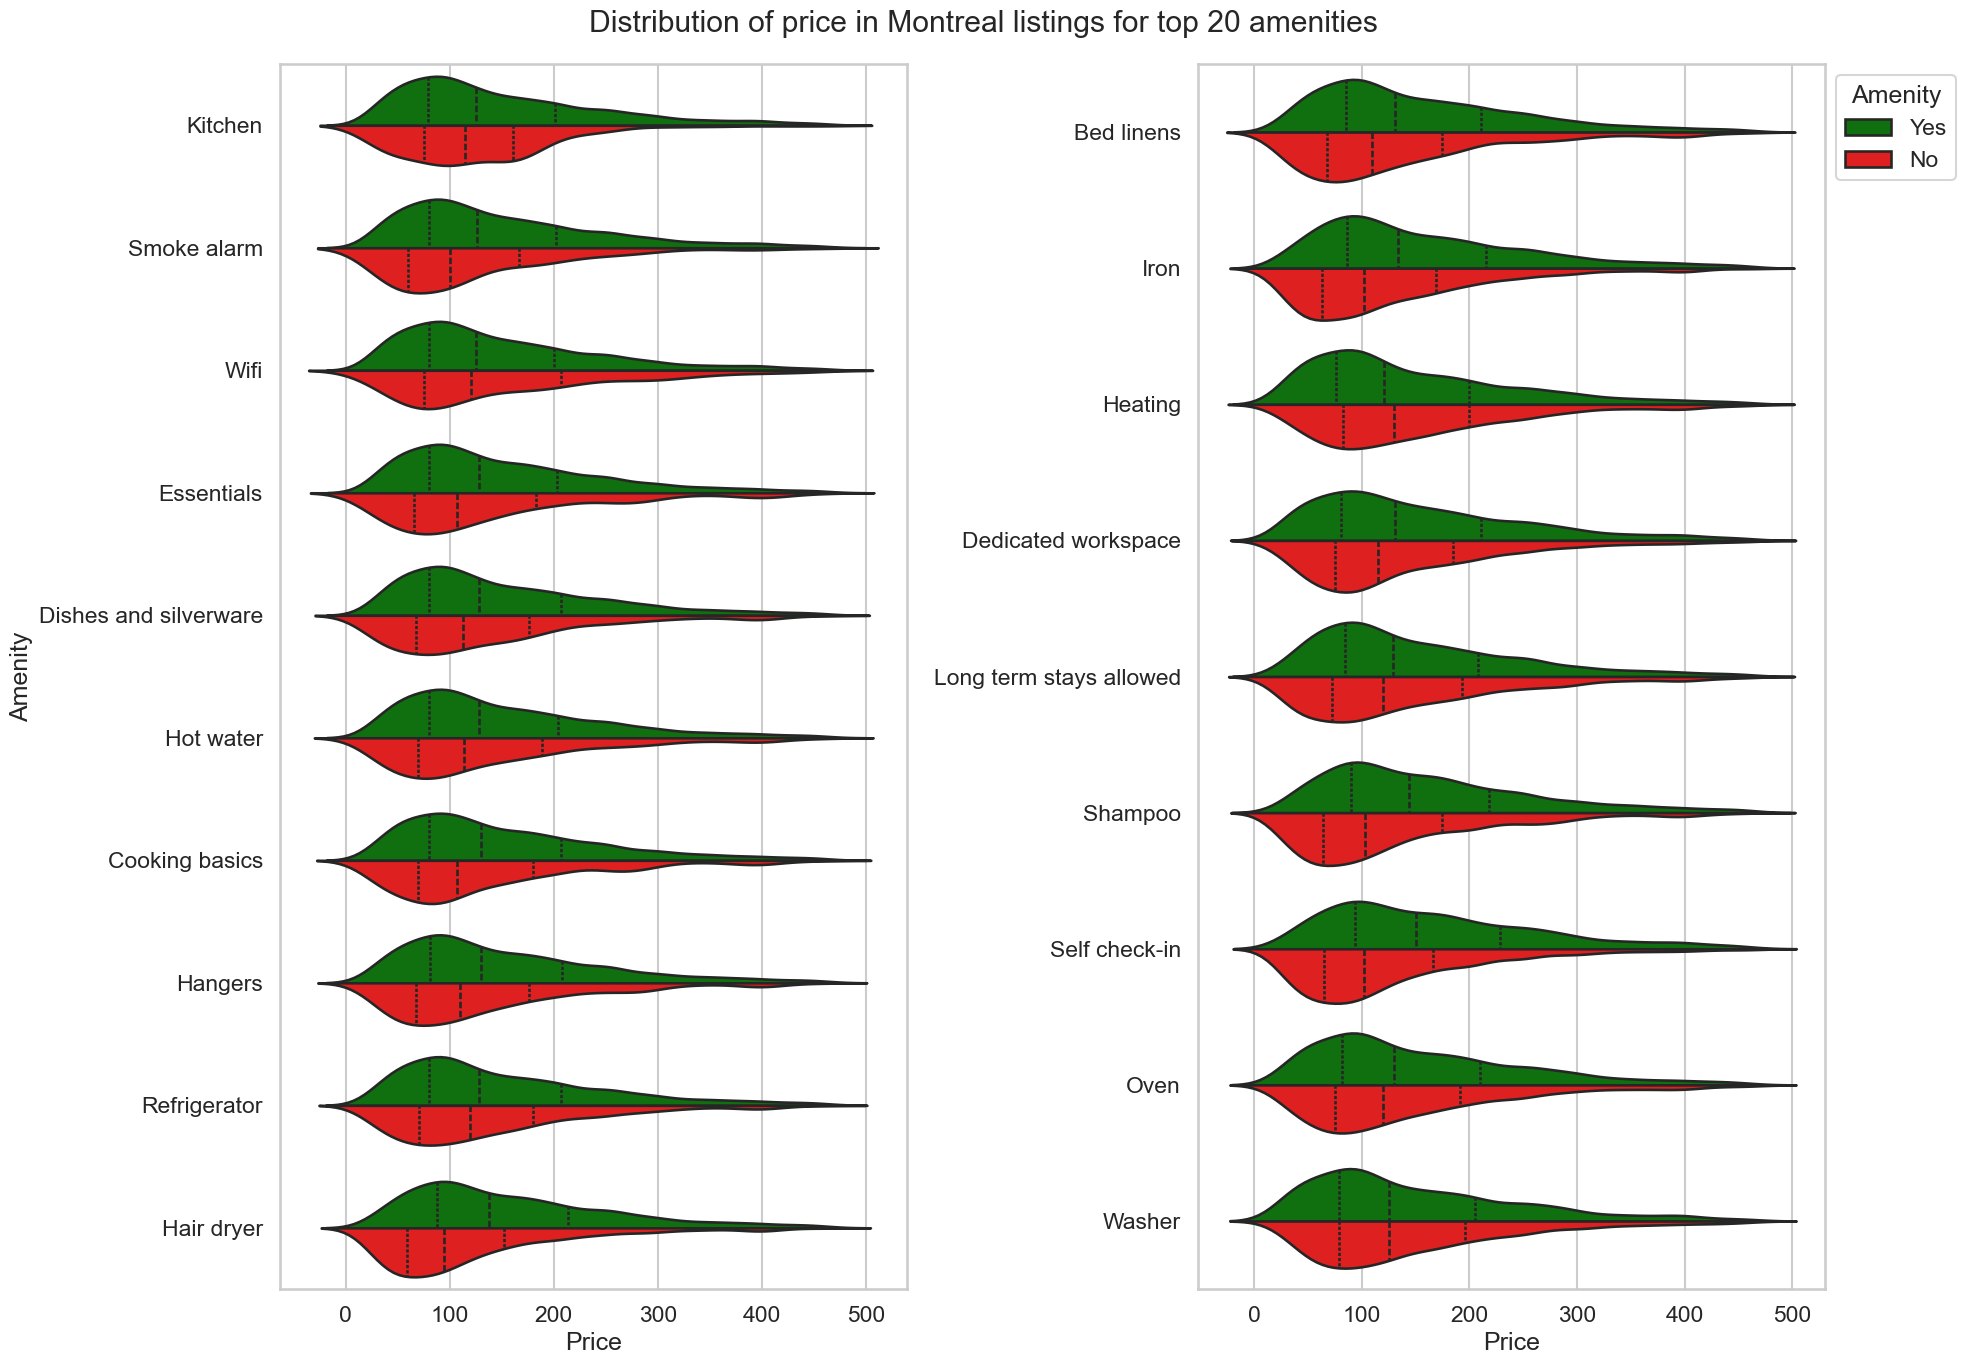

In [28]:
# Visualizing the average price of listings with and without amenities
plt.figure(figsize=(20, 14))
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(
    (
        data_cleaned.loc[:, ["price"] + top_20_amenities[:10]]
        .melt(id_vars="price", var_name="amenity", value_name="amenity_present")
        .replace({1: "Yes", 0: "No"})
    ),
    y="amenity",
    x="price",
    hue="amenity_present",
    split=True,
    inner="quartile",
    palette={"Yes": "green", "No": "red"},
)
ax1.set_xlabel("Price")
ax1.set_ylabel("Amenity")
ax1.legend_.remove()

plt.subplot(1, 2, 2)
ax2 = sns.violinplot(
    (
        data_cleaned.loc[:, ["price"] + top_20_amenities[11:]]
        .melt(id_vars="price", var_name="amenity", value_name="amenity_present")
        .replace({1: "Yes", 0: "No"})
    ),
    y="amenity",
    x="price",
    hue="amenity_present",
    split=True,
    inner="quartile",
    palette={"Yes": "green", "No": "red"},
)
ax2.set_xlabel("Price")
ax2.set_ylabel(None)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1), ncol=1, title="Amenity")


plt.suptitle(
    f"Distribution of price in {city.capitalize()} listings for top 20 amenities"
)
plt.tight_layout()
plt.show()


From the above, we see that the presence of most amenities tend to increase the price of a listing. We can use this information to create a new feature called `num_amenities` which is the total number of amenities offered by a listing.

Further, we can create dummies for the top 20 amenities and use them as features in our model.


### Visualizing on a map


In [46]:
map = folium.Map(
    location=[data_cleaned["latitude"].mean(), data_cleaned["longitude"].mean()],
    zoom_start=12,
    max_zoom=20,
    tiles=None,
)

folium.TileLayer("cartodbpositron", opacity=0.8, control=False).add_to(map)

# Create a color scale based on the price of listings in data_cleaned
vmin = data_cleaned["price"].quantile(0.05)
vmax = data_cleaned["price"].quantile(0.95)

colors = ["green", "lightgreen", "yellow", "orange", "red"]
price_scale = branca.colormap.LinearColormap(
    colors,
    vmin=vmin,
    vmax=vmax,
    caption="Price",
    index=[
        vmin,
        (vmin + vmax) / 4,
        (vmin + vmax) / 2,
        3 * (vmin + vmax) / 4,
        vmax,
    ],
)

price_scale = price_scale.to_step(15)

price_scale.add_to(map)


listings_group = plugins.MarkerCluster(name="Listings", control=False)
map.add_child(listings_group)


room_type = {}
for r_type in data_cleaned["room_type"].unique():
    room_type[r_type] = plugins.FeatureGroupSubGroup(listings_group, name=r_type)

for idx, row in data_cleaned.iterrows():
    popup_html = f"""
    <div style='font-family: Helvetica, Arial, sans-serif;'>
        <h4 style='margin-bottom: 10px; color: #333;'>{row["name"]}</h4>
        <div style='font-size: 14px; color: #888; margin-bottom: 10px;'>
            <p style='margin: 2px 0;'><b>Price:</b> ${row["price"]}</p>
            <p style='margin: 2px 0;'><b>Neighbourhood:</b> {row["neighbourhood_cleansed"]}</p>
            <p style='margin: 2px 0;'><b>Room type:</b> {row["room_type"]}</p>
            <p style='margin: 2px 0;'><b>Rating:</b> {row["review_scores_rating"]}</p>
            <p style='margin: 2px 0;'><b>Minimum nights:</b> {row["minimum_nights"]}</p>
        </div>
        <a href="{row['listing_url']}" target="_blank" style='color: #007BFF; text-decoration: none; display: inline-block; margin-bottom: 10px;'>View on Airbnb</a>
        <div style='width: 80%; height: 200px; overflow: hidden; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.1); display: flex; justify-content: center'>
            <img src="{row['picture_url']}" alt='Listing image' style='height: 100%; width: 100%; object-fit: cover; border-radius: 10px;'>
        </div>
    </div>
    """

    popup = folium.Popup(folium.IFrame(html=popup_html, width=400, height=400), max_width=400)

    marker = folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        popup=popup,
        radius=5,
        fill=True,
        fill_opacity=1,
        color=price_scale(row["price"]),
    )

    marker.add_to(room_type[row["room_type"]])

for group in room_type.values():
    map.add_child(group)

map.add_child(
    plugins.MiniMap(tile_layer="cartodbpositron", toggle_display=True, minimized=True)
)
map.add_child(folium.LayerControl(collapsed=False))
map.add_child(plugins.Fullscreen())

map.save(f"maps/{city}.html")
map